# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [26]:
import pandas as pd

In [27]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [28]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



# Data Analysis

In [30]:
# Importing required libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#from imblearn.over_sampling import SMOTE
%matplotlib inline

In [31]:
# Call functions in bank_Utility.py
from bank_Utility import upper_outlier_percentage, create_pie, table_of_target_var, cat_to_dummy, cat_to_one_hot
from bank_Utility import delete_upper_outliers, ROC_curve, plot_top5_feature_importances

Text(0.5, 1.0, 'Pie Chart of y')

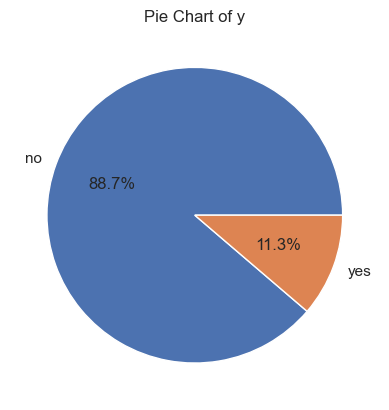

In [32]:
# Categorical variable: y
sns.set(style="whitegrid")
create_pie(df, "y")
plt.title("Pie Chart of y")

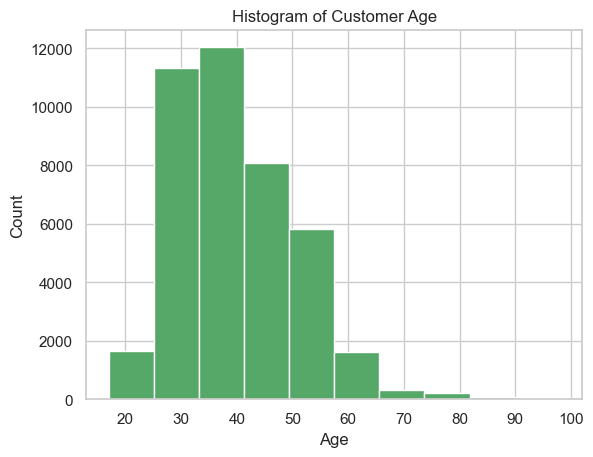

,age
count,41188.00000
mean,40.02406
std,10.42125
min,17.00000
25%,32.00000
50%,38.00000
75%,47.00000
max,98.00000


In [33]:
#For a numerical variable, I showed a histogram, a boxplot, and a statistical detail. For categorical variables, I made bar charts and pie charts.
plt.hist(df['age'], bins=10, color="g")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Histogram of Customer Age")
plt.show()
df[['age']].describe()

Text(0.5, 1.0, 'Bar Chart of Customer Job')

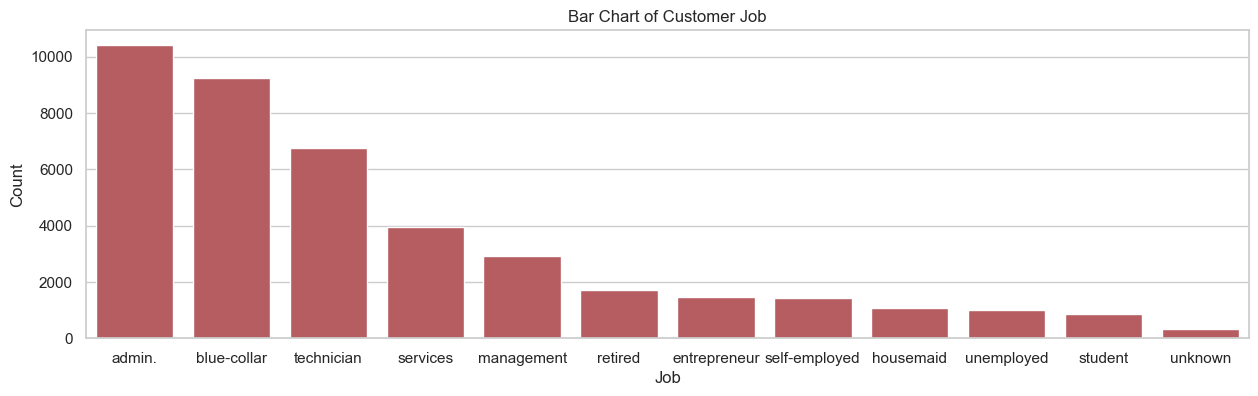

In [34]:
# Categorical variable: job
plt.figure(figsize=(15, 4))
sns.countplot(x="job", data=df, color="r", order = df['job'].value_counts().index)
plt.xlabel("Job")
plt.ylabel("Count")
plt.title('Bar Chart of Customer Job')

Text(0.5, 1.0, 'Bar Chart of Customer Marital Status')

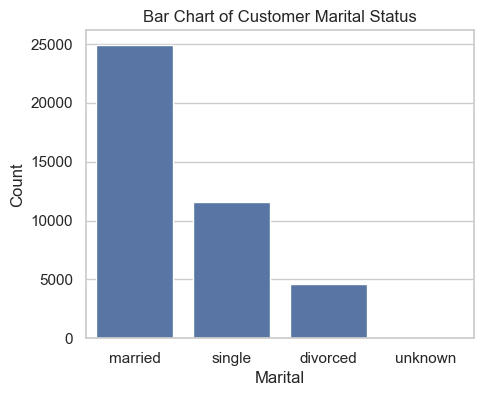

In [35]:
# Categorical variable: marital
plt.figure(figsize=(5, 4))
sns.countplot(x="marital", data=df, color="b", order = df['marital'].value_counts().index)
plt.xlabel("Marital")
plt.ylabel("Count")
plt.title('Bar Chart of Customer Marital Status')

Text(0.5, 1.0, 'Bar Chart of Customer Education')

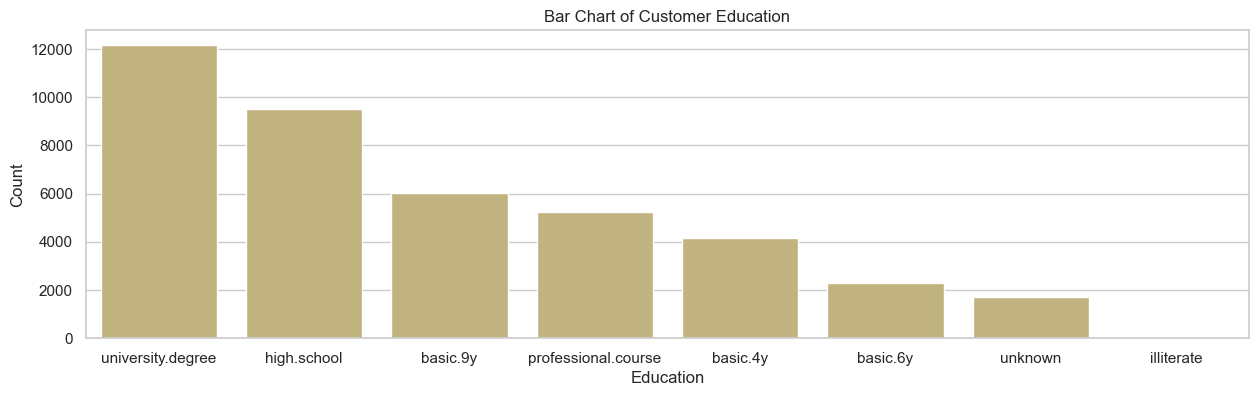

In [36]:
# Categorical variables: education
plt.figure(figsize=(15, 4)) 
sns.countplot(x="education", data=df, color="y", order = df['education'].value_counts().index).set(ylabel=None)
plt.xlabel("Education")
plt.ylabel("Count")
plt.title('Bar Chart of Customer Education')

Text(0.5, 1.0, 'Pie Chart of Personal Loan')

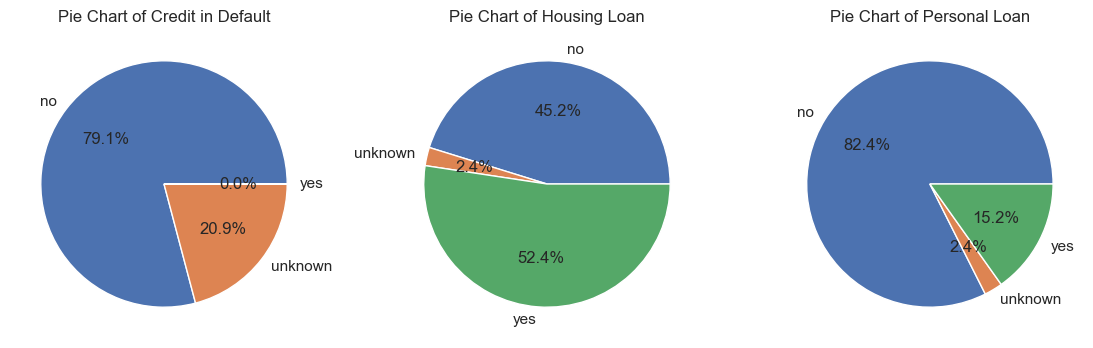

In [37]:
# Categorical variables
plt.figure(figsize=(14, 4))

# default
plt.subplot(1, 3, 1) 
create_pie(df, "default")
plt.title("Pie Chart of Credit in Default")
 
# housing
plt.subplot(1, 3, 2)
create_pie(df, "housing")
plt.title("Pie Chart of Housing Loan")

# loan
plt.subplot(1, 3, 3) 
create_pie(df, "loan")
plt.title("Pie Chart of Personal Loan")

First perform exploratory data analysis, clean and preprocess the dataset and then build a Logistic Regression, KNN, Decision Tree to predict marketing campaign outcome of a Portuguese banking institution. Analyze models results and give some future scopes.

In [38]:
# campaign outliers
upper_outlier_percentage(df, "campaign")
# previous outliers
upper_outlier_percentage(df, "previous")

campaign has 5.84% outliers.
previous has 13.66% outliers.


In [39]:
cleaned_df = delete_upper_outliers(df, "age")
cleaned_df = delete_upper_outliers(cleaned_df, "cons.conf.idx")
cleaned_df.shape

(40327, 21)

In [40]:

# Check whether there are any null values in the data set
print(df.isnull().values.any())

# Summation of missing values in the data set
print(df.isnull().sum().sum())

False
0


In [41]:
cleaned_df = cleaned_df.drop(['pdays', 'duration'], axis=1)
cleaned_df.shape

(40327, 19)

In [42]:
# yes/no column
cleaned_df['y'].value_counts()

y
no     36068
yes     4259
Name: count, dtype: int64

In [43]:
cleaned_df['y'] = [0 if i == "no" else 1 for i in cleaned_df['y']]
cleaned_df['y'].value_counts()

y
0    36068
1     4259
Name: count, dtype: int64

In [44]:
#X and y variables
X = cleaned_df.drop(columns = 'y')
y = cleaned_df[['y']]
y = y.values.ravel()

# Train/Test Split


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2021)

In [46]:
# avoid the dummy variable
cate_col = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
X_lr_train = X_train
X_lr_train = cat_to_dummy(cate_col, X_lr_train)
X_lr_test = X_test
X_lr_test = cat_to_dummy(cate_col, X_lr_test)

In [47]:
X_train = cat_to_one_hot(cate_col, X_train)
X_test = cat_to_one_hot(cate_col, X_test)

In [48]:
table_of_target_var(y_train)
print("Total observations in the training dataset:", len(y_train))

[[    0 25239]
 [    1  2989]]
Total observations in the training dataset: 28228


In [49]:
# Standardizes X for KNN mdoel
scaler = StandardScaler()
scaler.fit(X_train)
X_knn_train = scaler.transform(X_train)
X_knn_test = scaler.transform(X_test)

# Modeling: Supervised Learning

# Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter=10000)
LR.fit(X_lr_train, y_lr_train)

NameError: name 'y_lr_train' is not defined

# KNN

In [51]:
# Tuning Models with GridSearchCV

from sklearn.model_selection import GridSearchCV

from sklearn import neighbors
knn = neighbors.KNeighborsClassifier()

params = {"n_neighbors": np.arange(5,10), "metric": ["euclidean", "cityblock"]}
grid_knn = GridSearchCV(estimator=knn, param_grid=params)
grid_knn.fit(X_knn_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'cityblock'],
                         'n_neighbors': array([5, 6, 7, 8, 9])})

In [52]:
# Print Optimal KNN
print(grid_knn.best_score_)
print(grid_knn.best_estimator_.n_neighbors)
print(grid_knn.best_estimator_.metric)

0.9009849625074556
8
cityblock


In [53]:
KNN = neighbors.KNeighborsClassifier(n_neighbors=6, metric='cityblock')
KNN.fit(X_knn_train, y_train)

KNeighborsClassifier(metric='cityblock', n_neighbors=6)

# Decision Tree

In [54]:
# Tuning Models with GridSearchCV

from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : list(range(5, 10)),
}

grid_dt = GridSearchCV(DT, param_grid=params)
grid_dt.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9]})

In [55]:
# Print Optimal DT
print(grid_dt.best_score_)
print(grid_dt.best_params_)
print(grid_dt.best_estimator_)

0.90541324630934
{'criterion': 'entropy', 'max_depth': 5}
DecisionTreeClassifier(criterion='entropy', max_depth=5)


In [56]:
#  Optimal Hyperparameters
DT = DecisionTreeClassifier(criterion='gini', max_depth=9)
DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9)

In [57]:

#LR_pred = LR.predict(X_lr_test)
KNN_pred = KNN.predict(X_knn_test)
DT_pred = DT.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score, classification_report
#print('Logistic Regression Report:')
#print(classification_report(y_test, LR_pred))

print('KNN Report:')
print(classification_report(y_test, KNN_pred))

print('Decision Tree Report:')
print(classification_report(y_test, DT_pred))

KNN Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10829
           1       0.61      0.19      0.29      1270

    accuracy                           0.90     12099
   macro avg       0.76      0.59      0.62     12099
weighted avg       0.88      0.90      0.88     12099

Decision Tree Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10829
           1       0.57      0.28      0.37      1270

    accuracy                           0.90     12099
   macro avg       0.74      0.63      0.66     12099
weighted avg       0.88      0.90      0.89     12099



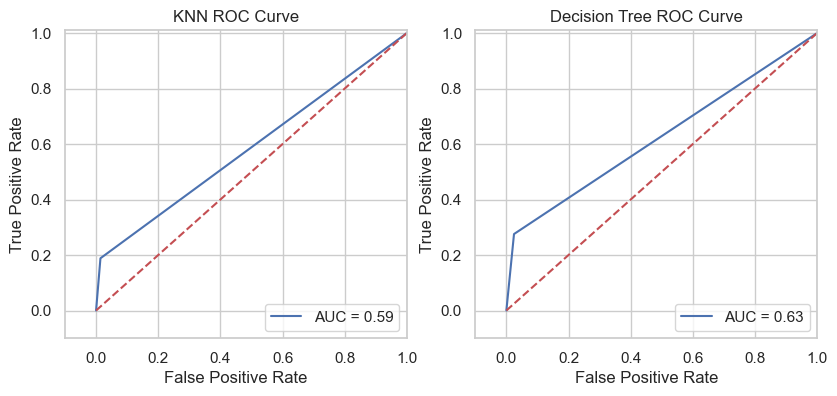

In [60]:
plt.figure(figsize=(15, 4))

#plt.subplot(1, 3, 1)
#ROC_curve(y_test, LR_pred)
#plt.title("Logistic Regression ROC Curve")

           
plt.subplot(1, 3, 2)
ROC_curve(y_test, KNN_pred)
plt.title("KNN ROC Curve")

plt.subplot(1, 3, 3)
ROC_curve(y_test, DT_pred)
plt.title("Decision Tree ROC Curve")
plt.show()

In [61]:
#From the charts above, we can tell that Decision Tree has the highest AUROC, 63%.

Text(0.5, 1.0, 'Decision Tree Top 5 Feature importances')

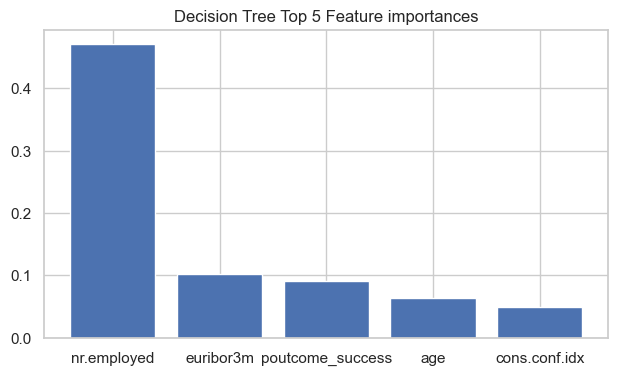

In [62]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plot_top5_feature_importances(X_train, DT.feature_importances_)
plt.title('Decision Tree Top 5 Feature importances')




##### Questions